# Dijkzicht je Dijk

Dit is een voorbeeld, hoe je relevante informatie over dijken via Plotly interactief kunt bekijken.

Veel dank aan de package `GeoProfile` die het mogelijk maakt om bodemopbouw makkelijk met Plotly te visualiseren.

In [1]:
import os
import pickle
import pandas as pd

In [2]:
import dijkzicht_func as dzf

# Gegevens openen

In [3]:
PLOT_PATH = r'plots\\'

Sonderingen zijn gedownload van Broloket en via `CPTcore` geclassificeerd via Robertson. De classificatie is opgeslagen.

In [4]:
with open(r'data\geoprofile_cols.pkl', "rb") as f:
    geoprofile_cols = pickle.load(f)
len(geoprofile_cols)

266

In [5]:
df_hm = pd.read_csv(r"data\df_hm.csv")
df_hm.head()

,HMTAFSTNL,x,y,dp
0,78500.0,66122.2958,402779.8589,785.0
1,78550.0,66117.1489,402829.5931,785.5
2,78600.0,66111.6999,402879.2952,786.0
3,78650.0,66106.3458,402929.0058,786.5
4,78700.0,66100.5037,402978.6426,787.0


In [6]:
df_profiles = pd.read_csv(r'data\df_profiles.csv')
df_profiles.head()

,Gebied,dp,yMV.bui,ysloot.1d,xMV.bin,xSloot.1a,xSloot.1c,xSloot.1d,xSloot.1b,xWeg.1,...,yTeen.1,yBerm.1a,yBerm.1b,yKruin.1,yKruin.2,yBerm.2a,yBerm.2b,yTeen.2,yWeg.2,ySloot.2
0,Os,785.0,-1.347,-0.99,-171.80,-18.80,-16.74,-16.51,-14.80,-12.80,...,1.830,5.150,5.150,5.15,5.09,3.73,3.66,-0.78,1.122,1.122
1,Os,786.0,-1.363,-0.99,-200.26,-25.26,-22.66,-17.15,-13.26,-13.26,...,2.050,5.190,5.190,5.19,5.11,3.99,3.37,-0.79,-1.363,-1.363
2,Os,787.0,-1.055,-0.99,-168.86,-59.86,-56.68,-42.92,-40.86,-38.86,...,0.563,2.045,2.391,5.11,5.13,3.92,3.72,-1.00,-1.055,-1.055
3,Os,788.0,-1.308,-0.99,-200.90,-78.90,-76.19,-24.48,-22.90,-22.90,...,0.061,1.747,2.117,5.38,5.53,4.00,3.77,-1.05,-1.308,-1.308
4,Os,789.0,-1.347,-0.99,-200.45,-89.45,-86.83,-23.95,-22.45,-19.45,...,1.790,5.500,5.500,5.50,5.41,3.99,3.73,-0.99,-1.347,-1.347


In [7]:
df_meta_deltaversterking = pd.read_csv(r'data\df_meta_deltaversterking.csv')
df_meta_deltaversterking.head()

,dp,dsn_file_tif
0,804.5,data\deltaversterking\dsn14_flipped.tif
1,809.4,data\deltaversterking\dsn13_flipped.tif
2,812.5,data\deltaversterking\dsn12_flipped.tif
3,818.1,data\deltaversterking\dsn10_flipped.tif
4,829.8,data\deltaversterking\dsn9_flipped.tif


In [8]:
df_gwl = pd.read_csv(r'data\df_gwl.csv')
df_gwl.head()

,name,x,y,location,tube_nr,screen_top,screen_bottom,ground_level,tube_top,region,dp,position,position_short,ref_distance,distance_to_ref,tube_bottom,timeseries_id
0,Os_dp820-0_KR_H,63121.737,403079.799,24B_001,10,3.69,2.69,5.894,5.84,Os,820.0,kruin,KR,82000.0,-1.910417,1.69,24B_001H
1,Os_dp820-0_KR_L,63121.737,403079.799,24B_001,30,0.89,-0.11,5.894,5.78,Os,820.0,kruin,KR,82000.0,-1.910417,-0.61,24B_001L
2,Os_dp854-0_BIB_H,60354.053,401812.434,24B_004,10,-0.40,-1.40,1.401,1.30,Os,854.0,binnenberm,BIB,85400.0,-19.560405,-2.40,24B_004H
3,Os_dp854-0_BIB_L,60354.053,401812.434,24B_004,30,-5.30,-6.30,1.401,1.25,Os,854.0,binnenberm,BIB,85400.0,-19.560405,-7.30,24B_004L
4,Os_dp854-0_KR_L,60365.199,401826.835,24B_003,30,-3.02,-4.02,6.678,6.54,Os,854.0,kruin,KR,85400.0,-1.378884,-5.02,24B_003L


# Doorsnede over lengterichting van de dijk

Een lengtedoorsnede van de dijk. Via de lijst `dp_list` worden rechte lijnen getrokken tussen de dijkpalen in `df_hm`.

De doorsnede opent in je browser. Hieronder komt de kaart te staan.

Add column to profile: 100%|██████████| 7/7 [00:00<00:00,  9.56it/s]


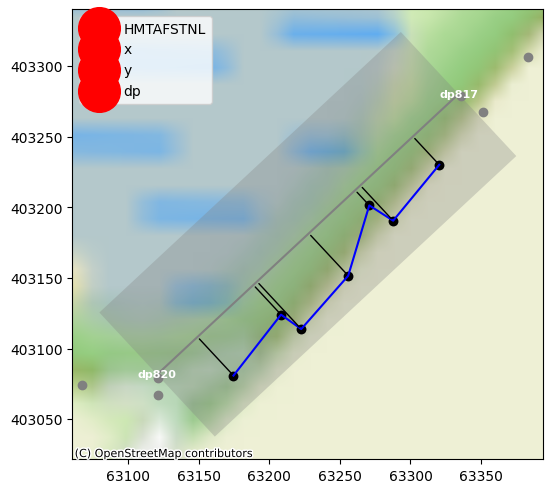

In [13]:
dp_list = [817, 820]
fig, profile = dzf.plot_geoprofile(
    geoprofile_cols, df_hm, dp_list, buffer=60, 
    projectname=f"Langs dijktraject Os{min(dp_list)}-{max(dp_list)}_Robertson",
    title_suffix='',
    plot_path=PLOT_PATH,)

# Doorsnede maken bij dijkpaal

Een doorsnede haaks op de dijk, ter hoogte van een dijkpaal. Weergegeven wordt het beschikbare grondonderzoek, de dichtstbijzijnde versterkingstekening van de Deltaversterking, het actuele maaiveld profiel en de peilbuizen.

Informatie van meerdere dijkpalen wordt weergegeven wanneer de `delta_dp` variabele wort gebuikt. Informatie van lagere dijkpalen krijgt een rode tint, informatie van hogere dijkpalen een blauwe.

Grondonderzoek wordt geprojecteerd ten opzichte van de referentielijn. Het wordt nooit bovenopelkaargeplot. Dan krijgt het een offset. Die offset is weergegeven tussen de haakjes in het label. Grondonderzoek van de opgevraagde raai wordt als eerste geplot, en staat dus vrijwel altijd op de juiste plek.

In [14]:
fig, fn = dzf.create_figure_for_dp(
    818, 
    df_meta_deltaversterking, 
    geoprofile_cols, 
    df_profiles,
    df_gwl,
    delta_dp=0,
    plot_path=PLOT_PATH,
    )

In [15]:
fig, fn = dzf.create_figure_for_dp(
    818, 
    df_meta_deltaversterking, 
    geoprofile_cols, 
    df_profiles,
    df_gwl,
    delta_dp=1,
    plot_path=PLOT_PATH,
    )

Een doorsnede met een peilbuis.

In [16]:
fig, fn = dzf.create_figure_for_dp(
    820, 
    df_meta_deltaversterking, 
    geoprofile_cols, 
    df_profiles,
    df_gwl,
    delta_dp=0,
    plot_path=PLOT_PATH,
    )